# [Computational Social Science] 
## 2-1 Math Fundamentals - Solutions

This lab will provide an introduction to numpy and scipy libraries in Python. 

---

### Topics Covered
- Numpy Array
- Numpy matrix
- Local minima/maxima
- Scipy optimize
- Scipy integrate


## Intro to Numpy <a id='section 1'></a>

Numpy uses its own data structure, an array, to do numerical computations. The Numpy library is often used in scientific and engineering contexts for doing data manipulation.

For reference, here's a link to the official [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/routines.html).

In [1]:
# import libraries 
import numpy as np

### Numpy Arrays

Arrays can hold many different data types, which makes them useful for many different purposes. Here's a few examples.

In [2]:
# create a list of intergers
sample_list = [1, 2, 3]

# create an array from a list
sample_array = np.array(sample_list)

# print  
print(sample_list)
print(sample_array) # notice array does not have "," separating elements like in a list

[1, 2, 3]
[1 2 3]


Try to make an array with three different arrays 1-3, 4-6, and 7-9.

In [3]:
# create a list of three lists 
sample_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# create a nested array 
sample_array = np.array(sample_list)

# print out results
print(sample_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Evaluating Conditions

What does this operation do? What is the data type returned every time the ">" is evaluated, and why is it important?

In [4]:
# identify for each element in the nested matrix are greater than 3; returns a Boolean value
sample_array > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [5]:
# can't evaluate elements in Python list
#sample_list > 3 

**Your answer:** Changes all matrix values that are greater than three to 'True', and all other values to 'False'. The 'True' and 'False' values are called "booleans" and they are useful for evaluating conditions.

### Matrix

A **matrix** is a rectangular array. In Python, it looks like an array of arrays. We say that a matrix $M$ has shape **$m$x$n$**; that is, it has $m$ rows (different smaller arrays inside of it) and $n$ columns (elements in each smaller matrix). 

Matrices are used a lot in machine learning to represent sets of features and train models. Here, we'll give you some practice with manipulating them.

Start by creating an empty matrix (filled with 0s) with dimensions 10 x 2. **Hint**: Look up the documentation for numpy's "zeros" method.

In [6]:
# create an empty matrix
"""
Here, we will generate a multidimensional array of zeros. This might be
useful as a starting value that could be filled in.
"""
z = np.zeros((10, 2))
print(z)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Identity Matrix

The **identity matrix** is a square matrix (i.e. size $n$x$n$) with all elements on the main diagonal equal to 1 and all other elements equal to zero. Make one below using `np.eye(n)`.

In [7]:
# make an identity matrix I of dimension 4x4
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Matrix Manipulation

Let's do some matrix manipulation. Here are two sample matrices to use for practice.

In [8]:
# sample matrices
m1 = np.array([[1, 3, 1], [1, 0, 0]])
m2 = np.array([[0, 0, 5], [7, 5, 0]])

# print results
print("matrix 1 is:\n", m1)
print("matrix 2 is:\n", m2)

matrix 1 is:
 [[1 3 1]
 [1 0 0]]
matrix 2 is:
 [[0 0 5]
 [7 5 0]]


You can add two matrices together if they have the same shape. Add our two sample matrices using the `+` operator.

In [9]:
# sum the two matrices
m1 + m2

array([[1, 3, 6],
       [8, 5, 0]])

Every value in a matrix can also be multiplied by a single number, also called a **scalar**. Multiply one of the example matrices by a number using the `*` operator and see what it outputs. Note: this is not to be confused with matrix multiplication, which is generally associated with finding the dot product. 

In [10]:
# scale matrix 1 (m1) by 3
m1 * 3

array([[3, 9, 3],
       [3, 0, 0]])

You can sum all the elements of a matrix using `.sum()`.

In [11]:
# sum of all of the elements in matrix 1
m1.sum()

6

And you can get the average of the elements with `.mean()`

In [12]:
# find the mean of all elements in matrix 2
m2.mean()

2.8333333333333335

Sometimes it is necessary to **transpose** a matrix to perform operations on it. When a matrix is transposed, its rows become its columns and its columns become its rows. Get the transpose by calling `.T` on a matrix (note: no parentheses)

In [13]:
# transpose matrix 1
m1.T

array([[1, 1],
       [3, 0],
       [1, 0]])

Other times, you may need to rearrange an array of data into a particular shape of matrix. Below, we've created an array of 16 numbers:

In [14]:
# create an array that of numbers, which we will then reshape into a matrix
H = np.arange(1, 17) # note that the method is exclusive
H

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

Use `.reshape()` on H to change its shape. `.reshape()` takes two arguments: the first is the desired number of rows, and the second is the desired number of columns. Try changing H to be a 4x4 matrix.

*Note: if you try to make H be a 4x3 matrix, Python will return an error. Why?*

In [15]:
# make H a 4x4 matrix
H = H.reshape(4, 4) # note that you could make this a 2 by 8 matrix bc that will use all 16 elements
H

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Next, let's find the transpose of matrix H.

In [16]:
# transpose matrix H and assign it the object name: H_t 
H_t = H.T
H_t

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

Next, we'll talk about **matrix multiplication**. The [dot product](https://en.wikipedia.org/wiki/Matrix_multiplication#Matrix_product_.28two_matrices.29) gets used a lot in optimization problems, among other things. It takes two matrices (one $m$x$n$, one $n$x$p$) and returns a matrix of size $m$x$p$. For example, the product of a 2x3 matrix and a 3x4 matrix is a 2x4 matrix.

To use the dot product, the two matrices must have the same number of elements. Additionally, the number of *columns* in the first matrix must equal the number of *rows* in the second matrix. This is why it's important to know how to reshape and transpose matrices!

So, we can find the dot product of a 2x**3** matrix and a **3**x4 matrix because the number of columns in the first are equal to the rows of the second. 

You can specify the dot product of two matrices in `numpy` using either `matrix1.dot(matrix2)` or `matrix1 @ matrix2`.

Rember one of the properties  the dot product is that the product of a matrix and the identity matrix is just the first matrix. Check that that is the case below for the matrix `H`.

In [17]:
# step 1: view the H matrix
print(H)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [18]:
# step 2: create and view an identity matrix (I)
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [19]:
# step 3: find the dot product of H and I
print(H.dot(I))

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


However, remember that using the `*` operator conducts element-wise mulitiplication, which is not the same as finding the dot product. Instead the dot product is a more complicated procedure whereby you mutiply row elements in the first matrix by the corresponding columns elements in the second and sum their products. Here is a simple but dry [primer on the dot product](https://www.youtube.com/watch?v=87_7YVCnAOw).

In [20]:
# element-wise multiplication
print(H * I)

[[ 1.  0.  0.  0.]
 [ 0.  6.  0.  0.]
 [ 0.  0. 11.  0.]
 [ 0.  0.  0. 16.]]


How is the dot product different from multiplying two matrices together element-wise?

**YOUR ANSWER:** The dot product does row-by-column products and summation. Using `*` in numpy does element-wise multiplication (e.g. element i, j in the first matrix is multiplied by element i, j of the second).

#### Matrix inverse
##### Theorem: the product of a matrix m and its inverse is an identity matrix

Using the above theorem, to solve for x in Ax=B where A and B are matrices, what do we want to multiply both sides by?

Your answer here: $A^{-1}$

You can get the inverse of a matrix with `np.linalg.inv(my_matrix)`. Try it in the cell below.

Note: not all matrices are invertible. For those curious, here is a short primer on [calculating the inverse of a matrix](https://www.youtube.com/watch?v=01c12NaUQDw).

In [21]:
# create a new matrix from scratch, and call it m3
m3 = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])

# calculate the inverse of m3 using the numpy method linalg.inv()
m3_inverse = np.linalg.inv(m3)

# print results
print("matrix m3:\n", m3)
print("\ninverse matrix m3:\n", m3_inverse)

matrix m3:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

inverse matrix m3:
 [[1.         0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.25      ]]


In [22]:
# do we get the identity matrix?
m3_inverse.dot(m3)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### Exercise
In machine learning, we often try to predict a value or category given a bunch of data. The essential model looks like this:

$$ \large
Y =  X^T \theta
$$

Where $Y $ is the predicted values (a vector with one value for every row of X)), $X$ is a $m$x$n$ matrix of data, and $\theta$ (the Greek letter 'theta') is a **parameter** (an $n$-length vector). For example, X could be a matrix where each row represents a person, and it has two columns: height and age. To use height and age to predict a person's weight (our $y$), we could multiply the height and the age by different numbers ($\theta$) then add them together to make a prediction($y$).

The fundamental problem in machine learning is often how to choose the best $\theta$. Using linear algebra, we can show that the optimal theta is:

$$\large
 \hat{\theta{}} = \left(X^T  X\right)^{-1} X^T Y
$$

This problem specification should look familiar to you - [it is the same as regression](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)! As we'll see in the coming weeks, you have already been exposed to many machine learning algorithms already in your introductory statistics courses. The problem of estimating a model is the same, and the difference will mainly come in framing the ultimate goal of the model.

You now know all the functions needed to find theta. Use transpose, inverse, and matrix product operations to calculate theta using the equation above and the X and y data given below.

*Note that the equation above is expecting dot products of matrices, not element-wise multiplication!*

In [23]:
# set seed for reproducibility 
np.random.seed(seed=7)

# create an array of random numbers between 0 through 50 and add some random noise
y = np.arange(50) + np.random.normal(scale=10, size=50)
y

# create a 50 element array and transpose it. How can we transpose this array?
x = np.array([np.arange(50)]).T
x

# to that array, add a a column of ones to represent an intercept term
X = np.hstack([x, np.ones(x.shape)])
X

# let's use the formula above to find the best theta
theta = np.linalg.inv(X.T @X) @X.T @y
print(theta)

[ 0.97212862 -0.25104727]


In this case, our X is a matrix where the first column has values representing a feature, and the second column is entirely ones to represent an intercept term. This means our theta is a vector [m, b] for the equation $y=mx+b$, which you might recognize from algebra as the equation for a line (where $m$ is the slope of the line and $b$ is the intercept). Let's see how well our predictor line fits the data.

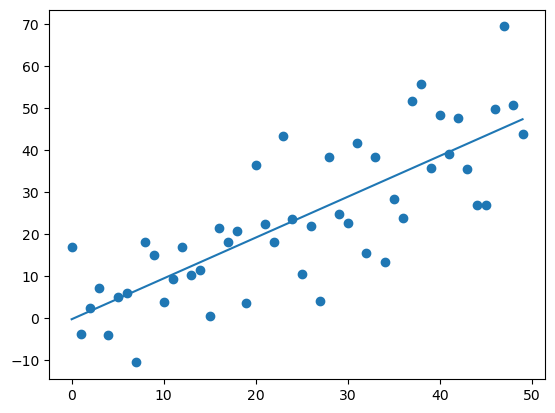

In [25]:
# import libraries and use magic function for formatting
import matplotlib.pyplot as plt
%matplotlib inline

#plot the data
plt.scatter(x,y)

#plot the fit line
plt.plot(x.T[0], X @theta);

Not bad!

While it's good to know what computation goes into getting optimal parameters, it's also good that `sklearn` has a function that will take in an X and a y and return the best theta. Run the cell below to use `scikit-learn` to estimate the parameters. It should output values very near to the ones you found. We'll learn how to use `scikit-learn` in the next lab! 

But just a check, the below code runs uses the same data and fits a linear regression. Do we get the same results when we did calcualted it manually?

In [26]:
# find optimal parameters using linear regression model

# import linear model from sklearn
from sklearn import linear_model

# initialize the model fit and set to lin_reg  object 
lin_reg = linear_model.LinearRegression(fit_intercept=True)

# fit a linear model to x and y arrays
lin_reg.fit(x, y)

# print the coefficients and intercept
print(lin_reg.coef_[0], lin_reg.intercept_)

0.9721286211808552 -0.25104726536426725


## Maxima and Minima <a id='section 2'></a>

The extrema of a function are the largest value (maxima) and smallest value (minima) of the function.

We say that f(a) is a **local maxima** if $f(a)\geq f(x)$ when x is near a.

We say that f(a) is a **local minima** if $f(a)\leq f(x)$ when x is near a.

Global vs local extrema (credit: Wikipedia)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/440px-Extrema_example_original.svg.png" style="width: 500px; height: 275px;" />

By looking at the diagram , how are local maxima and minima of a function related to its derivative? Remember that the derivative of a function represents its slope at a particular value of x. What is the slope at a function's minima and maxima?

**Answer**: Local minima and maxima occur when the derivative is zero-i.e. when the slope is zero, or when the tangent line is horizontal.

Are global maxima also local maixma? Are local maxima global maxima?

**Answer**: Yes, global maxima can be local maxima but no local maxima may not be a global maxima.

The main takeaway is that **derivatives are useful for finding local and global minima,** which are how cost functions optimize your model and find the best fit. 

However, it's easy to see how local minima could be mistaken for global minima. So, we need techniques to **prevent our cost function from mistaking a local for a global minima.** Adaptive learning rates to adjust the step size, random intialization of starting point, early stoppting, regularlization, etc. are just a few examples we will learn about later this semester. 

## Optional: Intro to Scipy <a id='section 3'></a>

The following part of this notebook is optional. We won't be taking a lot of derivatives in this course, but we reintroduce them to motivate your understanding of **optimization**. 


### Optimize

Derivatives are essential for understanding some of the methods we'll be learning soon, including gradient descent, neural networks, and regularized regression methods. More broadly, most machine learning learning applications are best thought of as **optimization problems** where we are trying to minimize a **cost function**. More simply, we want to minimize our prediction errors.

`scipy.optimize` is a package that provides several commonly used optimization algorithms. Today we'll learn minimize.

In [27]:
# import minimize function
from scipy.optimize import minimize

Let's define a minimization problem:

minimize $x_1x_4(x_1+x_2+x_3)+x_3$ under the conditions:
1. $x_1x_2x_3x_4\geq 25$
2. $x_1+x_2+x_3+2x_4 = 14$
3. $1\leq x_1,x_2,x_3,x_4\leq 5$

Hmmm, looks fairly complicated, but don't worry, scipy's got it

In [28]:
# let's define our function
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

In [29]:
# define constraints 1 and 2
def con1(x):
    return x[0]*x[1]*x[2]*x[3] - 25
def con2(x):
    return 14 - x[0] - x[1] - x[2] - 2*x[3]

constraint1 = {'type': 'ineq', 'fun': con1}  # constraint 1 is an inequality constraint
constraint2 = {'type': 'eq', 'fun': con2}    # constraint 2 is an equality constraint

cons = [constraint1, constraint2]

In [30]:
# define bounds, which is constraint 3
bound = (1, 5)
bnds = (bound, bound, bound, bound) # the same bound applies to all four variables

In [31]:
# We need to supply initial values as a starting point (first guess) for minimize function
x0 = [3, 4, 2, 3]
print(objective(x0))

83


Overall, we defined objective function, constraints, bounds, and initial values. Let's get to work.

We'll use [Sequential Least Squares Programming optimization algorithm (SLSQP)](http://www.pyopt.org/reference/optimizers.slsqp.html). Check out the documentation for the [`minimize()` method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to see possible parameters.

In [32]:
# implement minimize function to solution 
solution = minimize(objective, 
                    x0, 
                    method='SLSQP', 
                    bounds=bnds, 
                    constraints=cons)

In [33]:
# print the solution 
print(solution)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 21.50000000000228
       x: [ 1.000e+00  5.000e+00  5.000e+00  1.500e+00]
     nit: 3
     jac: [ 1.800e+01  1.500e+00  2.500e+00  1.100e+01]
    nfev: 15
    njev: 3


In [49]:
# display optimal values of each variable
print(solution.x)

[1.  5.  5.  1.5]


#### Exercise
Using the workflow from the exercise above, find the optimal solution to the following problem:

minimize $x1^2 + x2^2 + x3^2$, under conditions:
1. $x1 + x2\geq 6$
2. $x3 + 2x2\geq 4$
3. $1.5\leq x1, x2, x3\leq 8$

Tip: 3**2 gives square of 3

In [35]:
# define the problem
def func(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return x1**2 + x2**2 + x3**2
def newcon1(x):
    return x[0] + x[1] - 6
def newcon2(x):
    return x[2] + 2*x[1] - 4

Take note of scipy's documentation on constraints:

> "Equality constraint means that the constraint function result is to be zero whereas inequality means that it is to be non-negative."

In [36]:
# define the conditions and remaining parameters
newcons1 = {'type': 'ineq', 'fun': newcon1}
newcons2 = {'type': 'ineq', 'fun': newcon2}
newcons = [newcons1, newcons2]
bd = (1.5, 8)
bds = (bd, bd, bd)
newx0 = [1, 4, 3]

In [37]:
# find the solution
sum_square_solution = minimize(func, newx0, method='SLSQP', bounds=bds, constraints=newcons)
sum_square_solution

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 20.249999999998863
       x: [ 3.000e+00  3.000e+00  1.500e+00]
     nit: 4
     jac: [ 6.000e+00  6.000e+00  3.000e+00]
    nfev: 16
    njev: 4

### Integrals

The last concept we'll introduce is **integration**. Mathemetically, integration is the reverse operation of a derivative, because to find an integral you take the derivative and vice-versa. To make conceptual sense here, it's helpful to think of an example here. If you have the distance and time an object has traveled (integral), you can find the rate of change at any given point (derivative). If you have the rate at which something travels (derivative) you can find how far it has traveled over a given amount of time (integral). 

In other words, the  derivative identifies the rate of change at a specific point in time, whereas the intergral finds the cumulative  distance traveled (to extend the analogy think speedometer vs odometer).  

One common and important application of the integral in statistics and machine learning is to find the area under a curve, which allows us to calculate the probability of observing a given test result. 

Let's take a look: 

`scipy.integrate.quad` is a function that integrates a function from a to b using a technique from QUADPACK library.

In [38]:
# import libraries
from scipy import integrate

In [39]:
# define a simple function
def f(x):
    return np.sin(x)

In [40]:
# integrate sin from 0 to pi
integrate.quad(f, 0, np.pi)

(2.0, 2.220446049250313e-14)

Our quad function returned two results, first one is the result, second one is an estimate of the absolute error

#### Exercise
Find the integral of $x^2 + x$ from 3 to 10

In [41]:
# define the function
def f1(x):
    return x ** 2 + x

# find the integral
integrate.quad(f1, 3, 10)

(369.8333333333333, 4.10597481940537e-12)

#### Integrate a normal distribution

Within statistics, integration is important because it is related to the way we convert a **probability density function** to a **cumulative distribution function**.

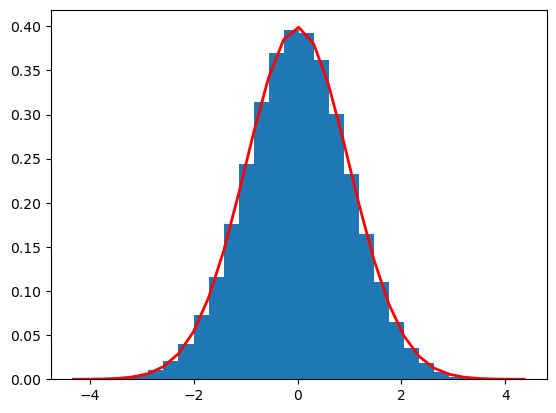

In [42]:
# create a normal distribution with mean 0 and standard deviation 1 
# import libraries
import matplotlib.pyplot as plt

# clear plot 
plt.clf()


# set population mean (mu) and standard deviation (sigma) to 1
mu, sigma = 0, 1 

# create a random normal distribution with mu and sigma by drawing 100,000 random samples
s = np.random.normal(mu, sigma, 100000)


# unpack normal distributions of s into counts and bins and plot histogram
count, bins, ignored = plt.hist(x = s, 
                                bins = 30, 
                                density=True)

# create normal curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

# plot show
plt.show()

In [43]:
# import normal distribution function
from scipy.stats import norm

CDF is cumulative distribution function. CDF(x) is the probability that a normal distribution takes on value less than or equal to x.

For a standard normal distribution, what would CDF(0) be and why?

**Answer:** 0.5 because it the cumulative distribution moves from left to right and includes half of the normal distribution up until 0. 

Run the cell below to confirm your answer

In [44]:
# cumulative distirbution function of normal distribution
norm.cdf(0)

0.5

Using the `cdf()` method to integrate the normal distribution from -0.5 to 0.5. Remember to look at the documentation and what you are trying to find. 

In [45]:
# integrate from -0.5 to 0.5
norm.cdf(.5) - norm.cdf(-.5)

0.38292492254802624

If you are a visual learner, below is some code to visualize what it means to find the integral between 0.5 and -0.5.

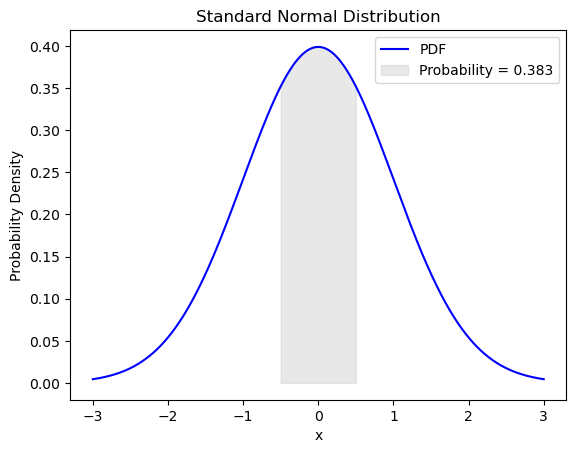

In [46]:
# Define the range
lower_bound = -0.5
upper_bound = 0.5

# Calculate the probabilities using the CDF
probability_upper = norm.cdf(upper_bound)
probability_lower = norm.cdf(lower_bound)

# Calculate the probability of the range
probability_range = probability_upper - probability_lower

# Generate x values for the plot
x = np.linspace(-3, 3, 1000)

# Plot the standard normal PDF
plt.plot(x, norm.pdf(x), 'b-', label='PDF')

# Shade the area under the curve within the range
x_fill = np.linspace(lower_bound, upper_bound, 100)
y_fill = norm.pdf(x_fill)
plt.fill_between(x_fill, y_fill, 
                 color='lightgray', 
                 alpha=0.5, 
                 label=f'Probability = {probability_range:.3f}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend()

# Show the plot
plt.show()


**Question:** What is the relationship between a probability distribution and a p-value? **Hint**: What is the CDF in the tails of the distribution? Assume a two-tailed test.

In [47]:
# Hint: What values do we get here? What do they mean?
print(norm.cdf(-1.96))
print(1 - norm.cdf(1.96))

0.024997895148220435
0.024997895148220484


**Answer**: A p-value is a statement of how unlikely a particular value would be given the background probability distribution.

Here is a two-tailed visualization assuming an `alpha` of 0.05 (critical z-score of 1.96)

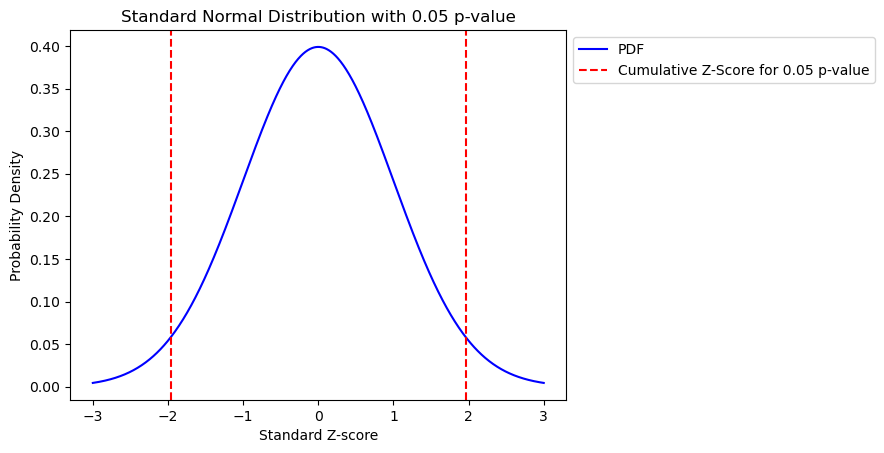

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the p-value (alpha level)
alpha = 0.025

# Find the z-scores corresponding to the p-value
z_score_positive = norm.ppf(1 - alpha)
z_score_negative = norm.ppf(alpha)

# Generate x values for the plot
x = np.linspace(-3, 3, 1000)

# Plot the standard normal PDF
plt.plot(x, norm.pdf(x), 'b-', label='PDF')

# Plot vertical lines at the z-scores
plt.axvline(x=z_score_positive, color='red', linestyle='--', 
            label=f'Cumulative Z-Score for 0.05 p-value')
plt.axvline(x=z_score_negative, color='red', linestyle='--')

# Add labels and legend
plt.xlabel('Standard Z-score')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution with 0.05 p-value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Set legend location and move it outside

# Show the plot
plt.show()

---
Materials for this notebook were based on the notebook developed by Tian Qin for [Legal Studies 123: Data, Prediction, and Law](https://github.com/Akesari12/LS123_Data_Prediction_Law_Spring-2019).